# Importing Necesseties

In [422]:
!pip install -r ../resources/requirements.txt



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [493]:
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
from nltk.corpus import stopwords

import random


**Below is a helper Function which generates random colors which can be used to give different colors to your plots.Feel free to use it**

In [494]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

# Reading the Data

In [495]:
data = pd.read_csv('../resources/data/Twitter_Emotion_Dataset.csv')
data

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."
...,...,...
4396,love,"Tahukah kamu, bahwa saat itu papa memejamkan m..."
4397,fear,Sulitnya menetapkan Calon Wapresnya Jokowi di ...
4398,anger,"5. masa depannya nggak jelas. lha iya, gimana ..."
4399,happy,[USERNAME] dulu beneran ada mahasiswa Teknik U...


So We have 4401 tweets

In [496]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4401 non-null   object
 1   tweet   4401 non-null   object
dtypes: object(2)
memory usage: 68.9+ KB


We have dont have any null values!

There are no null Values in the test set

b# EDA

In [497]:
data["label"].unique()

array(['anger', 'happy', 'sadness', 'love', 'fear'], dtype=object)

In [498]:
data.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


In [499]:
data.describe()

,label,tweet
count,4401,4401
unique,5,4389
top,anger,[USERNAME] Selamat Siang Sahabat Pos. Kiriman ...
freq,1101,4


Lets look at the distribution of tweets in the data set

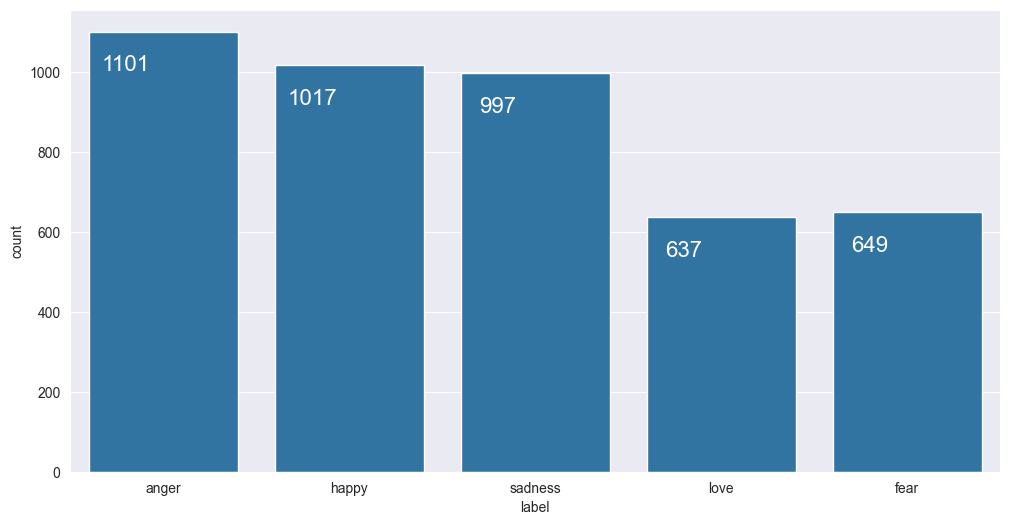

In [500]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(x=data['label'], data=data)
for p in ax.patches:
    ax.annotate(f'\n{int(p.get_height())}', (p.get_x() + 0.2, p.get_height()), ha='center', va='top', color='white',
                size=16)


Let's draw a Funnel-Chart for better visualization

In [501]:
data['Num_word_tweet'] = data['tweet'].apply(lambda x: len(str(x).split()))  #Number Of words in main text
data.head()


,label,tweet,Num_word_tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",27
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",35
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,17
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",32
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...",30


Let's look at the distribution of Meta-Features

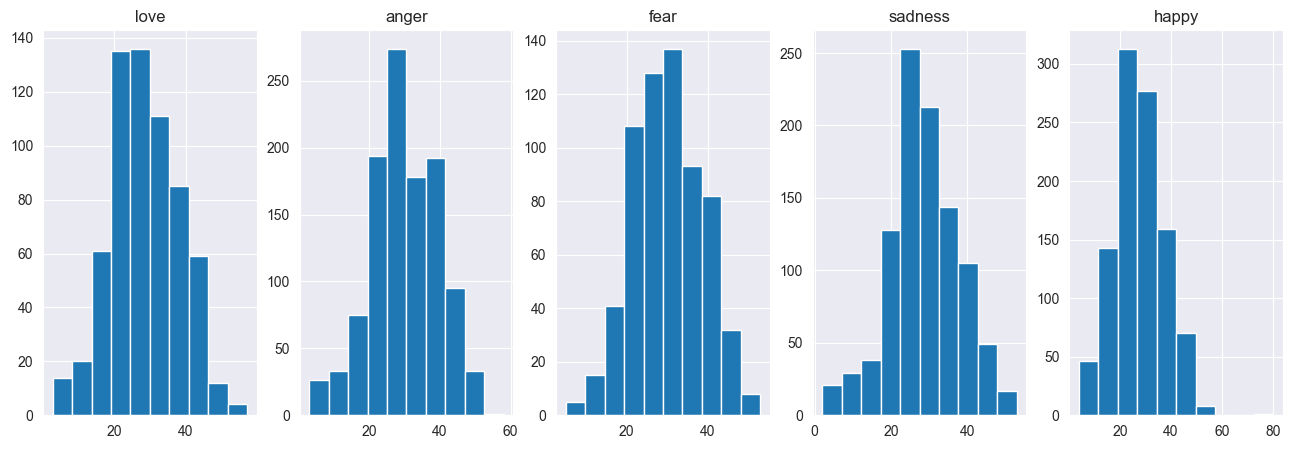

In [502]:
def plot_hist_by_label(feature_column_name):
    labels = set(data['label'])
    fig, ax = plt.subplots(1, len(labels), figsize=(16, 5))
    for idx_label, label in enumerate(labels):
        ax[idx_label].hist(data[data['label'] == label][feature_column_name])
        ax[idx_label].set_title(label)
    plt.plot()


plot_hist_by_label('Num_word_tweet')

* The number of words plot is really interesting ,the tweets having number of words greater than 150 are less likely to be part from happy, sadness or anger

In [503]:
data['mentions'] = data['tweet'].apply(
    lambda x: x.count('[USERNAME]') + x.count('username'))  #Number Of words in main text
data.head()


,label,tweet,Num_word_tweet,mentions
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",27,2
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",35,0
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,17,0
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",32,0
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...",30,1


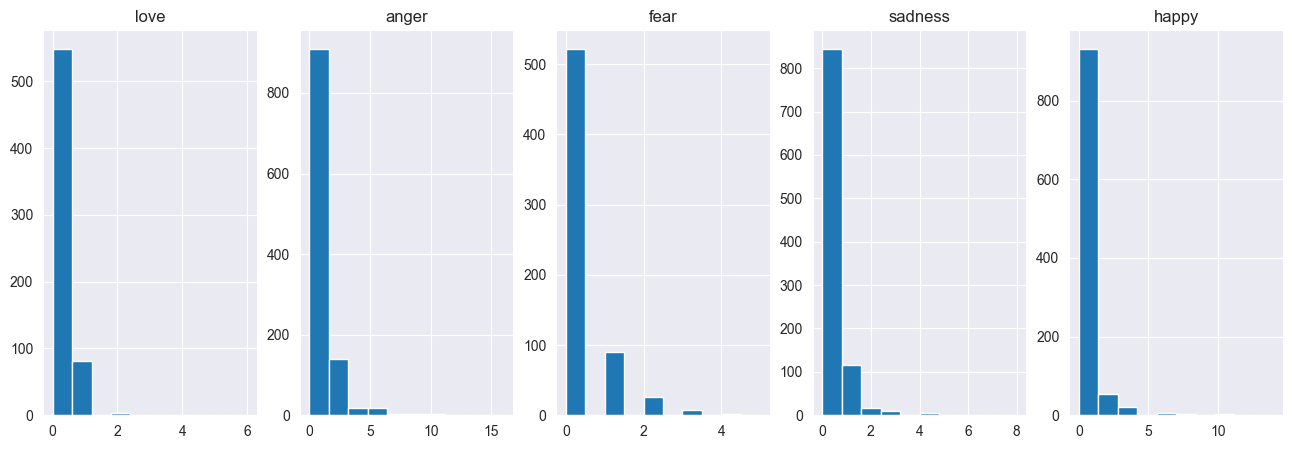

In [504]:
plot_hist_by_label('mentions')


We can see some interesting trends here:
* Happy tweets have less mentions on other
* Anger,Happy and Sadness tweets are longer than fear and love


## Lets talk emojis!

In [505]:
data['hashtags'] = data['tweet'].apply(lambda x: x.count('#'))  #Number Of words in main text
data.head()


,label,tweet,Num_word_tweet,mentions,hashtags
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",27,2,0
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",35,0,0
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,17,0,0
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",32,0,0
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...",30,1,0


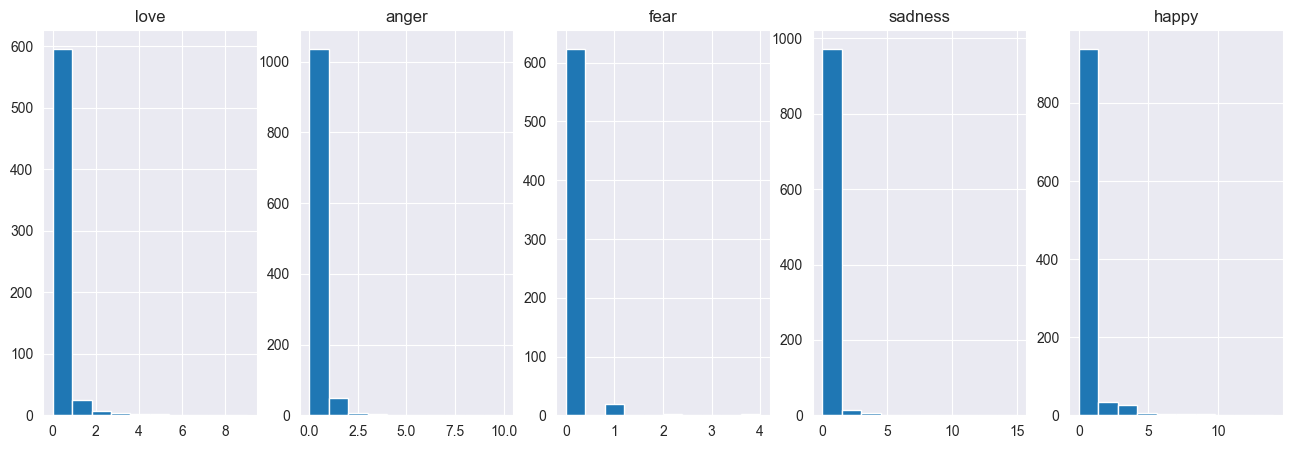

In [506]:
plot_hist_by_label('hashtags')


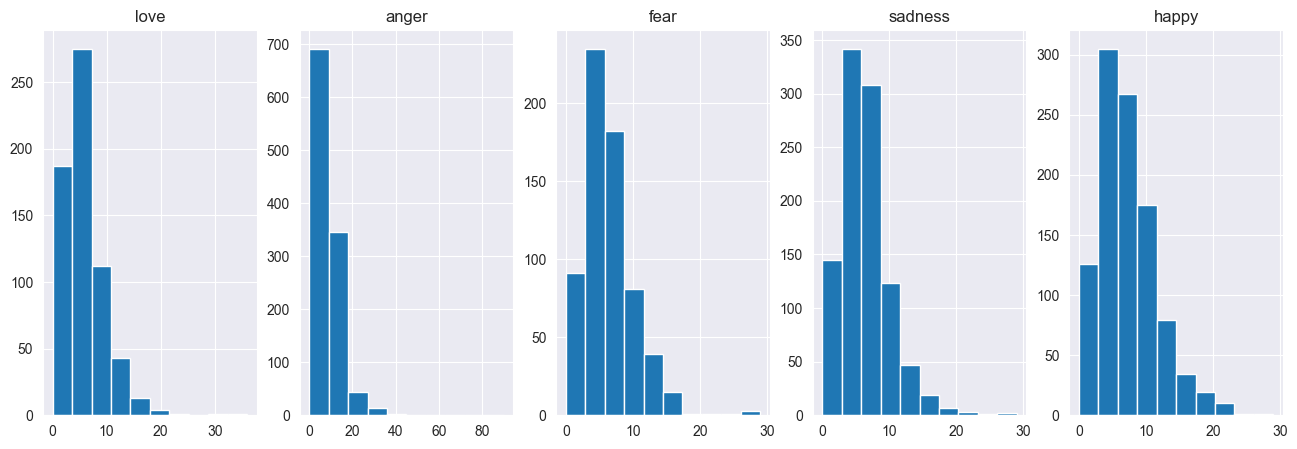

In [507]:
data['punctuation_count'] = data['tweet'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
plot_hist_by_label('punctuation_count')


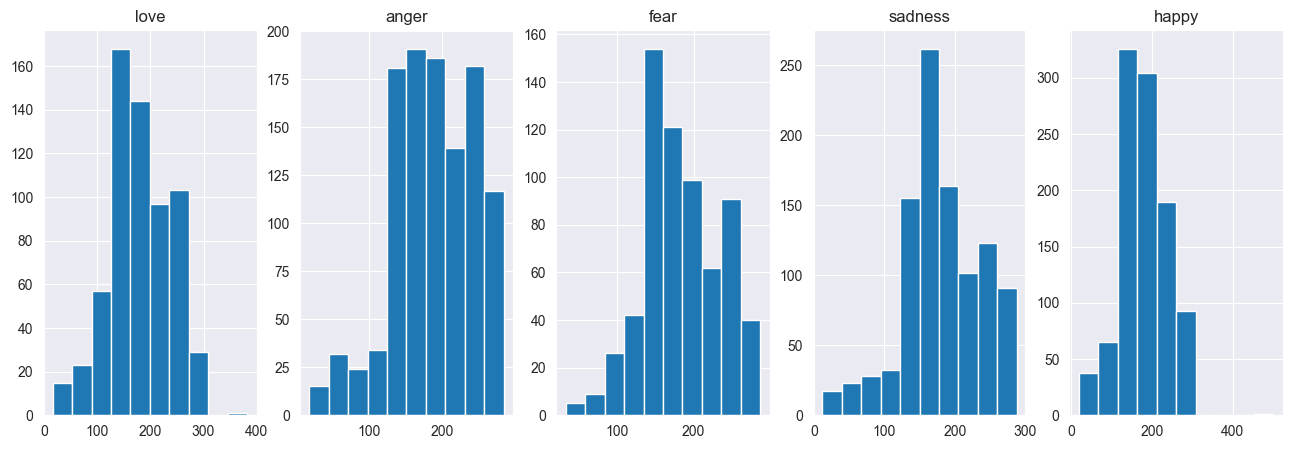

In [508]:
data['char_count'] = data['tweet'].apply(lambda x: len(str(x)))
plot_hist_by_label('char_count')


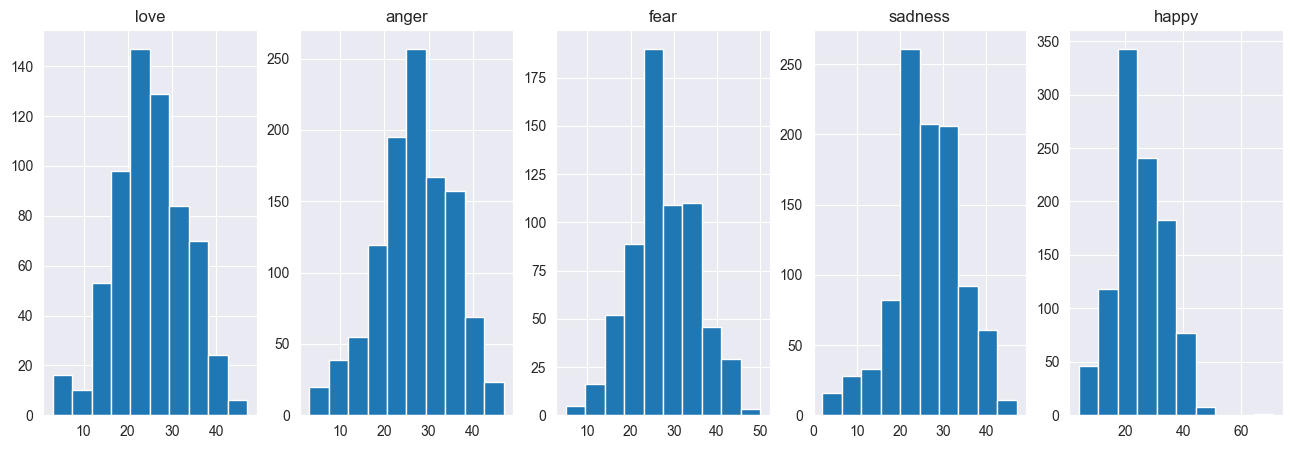

In [509]:
data['unique_word_count'] = data['tweet'].apply(lambda x: len(set(str(x).split())))

plot_hist_by_label('unique_word_count')


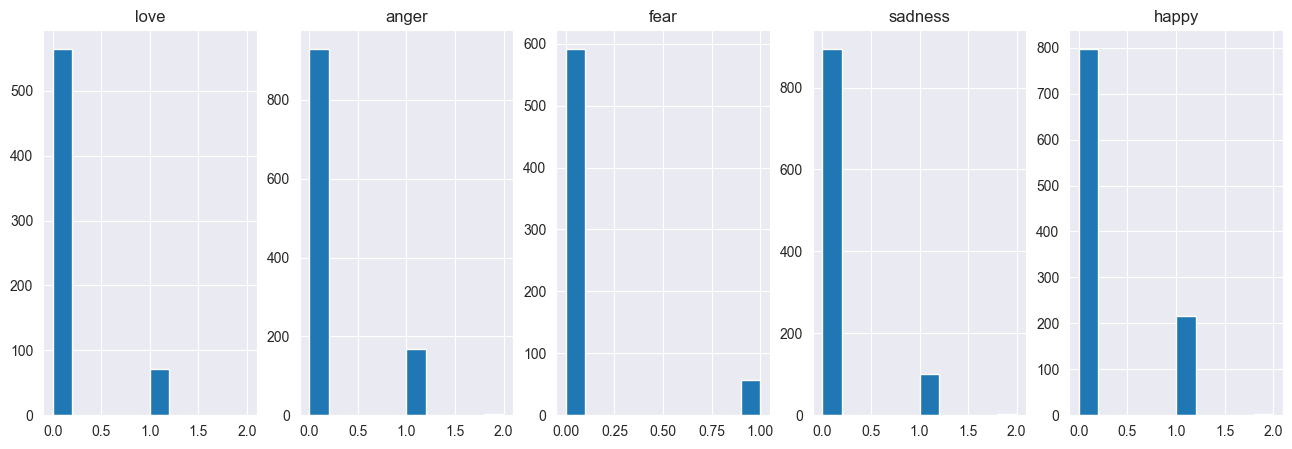

In [510]:
data['url_count'] = data['tweet'].apply(lambda x: x.lower().count("url"))
plot_hist_by_label('url_count')


In [511]:
indo_stop_words = stopwords.words(fileids='indonesian')
indo_stop_words.append("username")
indo_stop_words.append("url")
indo_stop_words.append("ya")
indo_stop_words.append("yg")

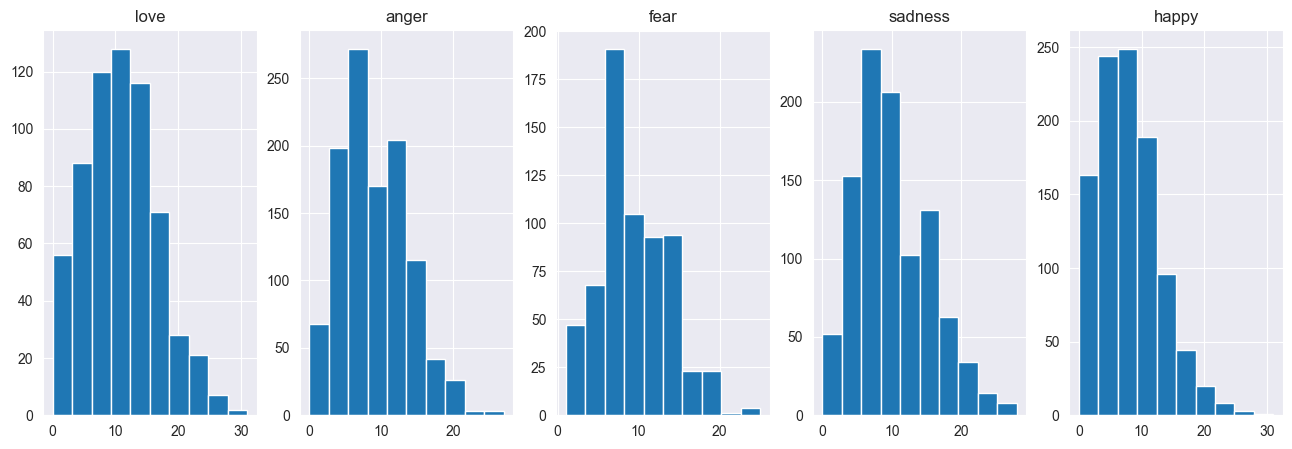

In [512]:

data['stop_word_count'] = data['tweet'].apply(
    lambda x: len([w for w in str(x).lower().split() if w in indo_stop_words]))

plot_hist_by_label('stop_word_count')


## Lets see some of the most common words per category

In [513]:
def plot_word_cloud(tweetdf, title):
    comment_words = ''
    stopwords = indo_stop_words

    # iterate through the csv file
    for val in tweetdf['tweet']:

        # typecaste each val to string
        val = str(val)
        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens) + " "

    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          min_font_size=10).generate(comment_words)

    # Plot the WordCloud image
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.title(title)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

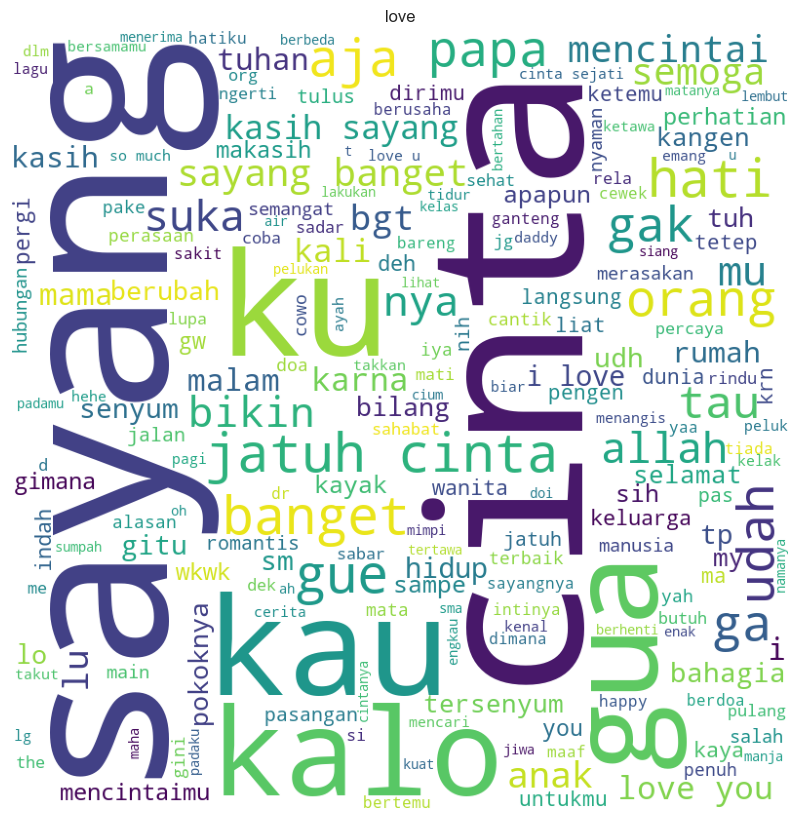

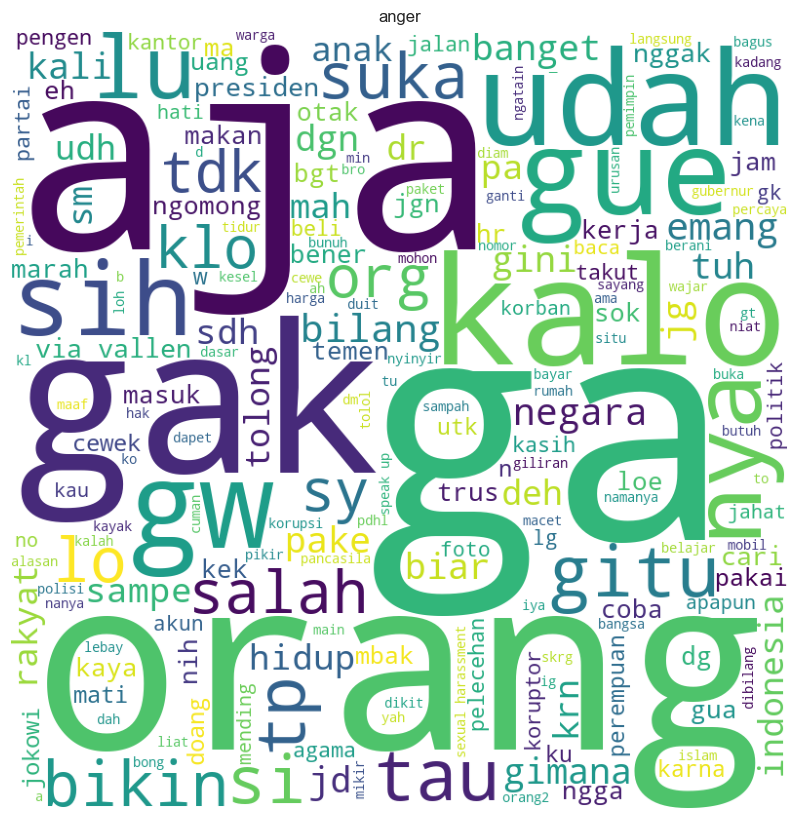

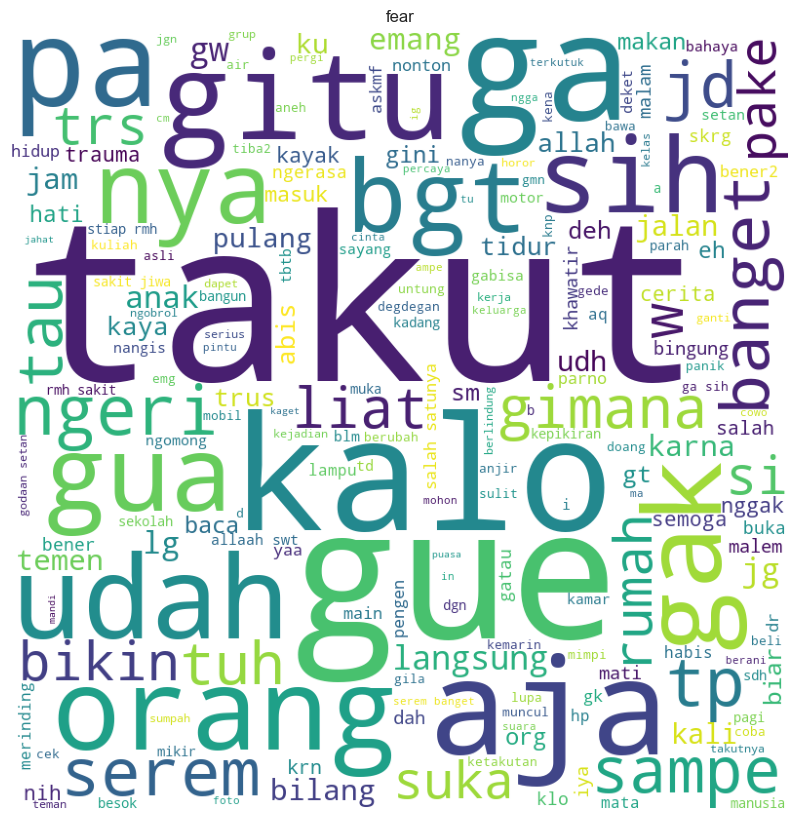

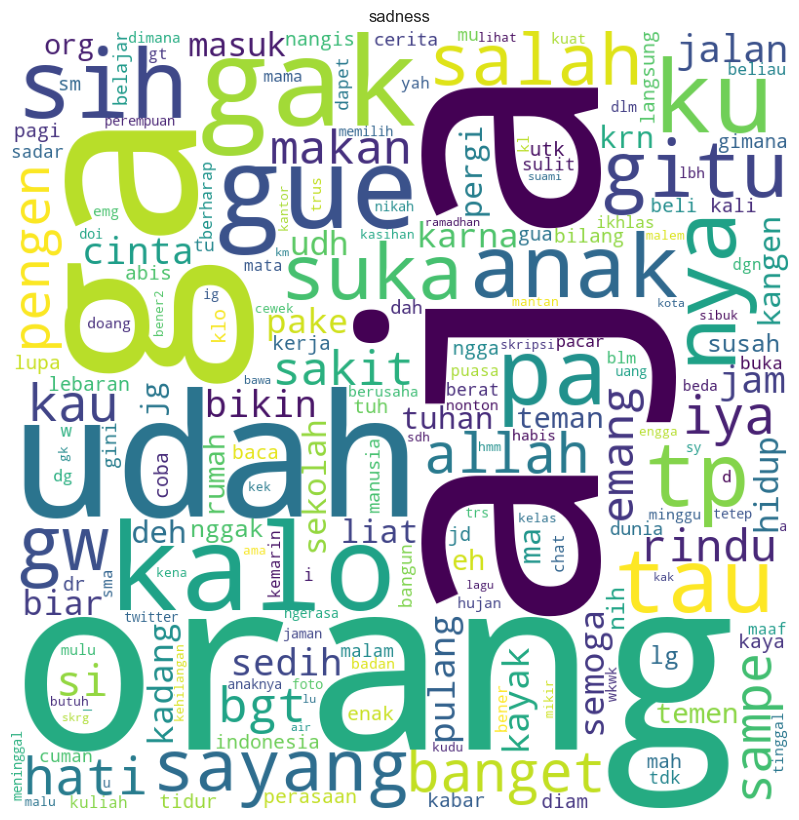

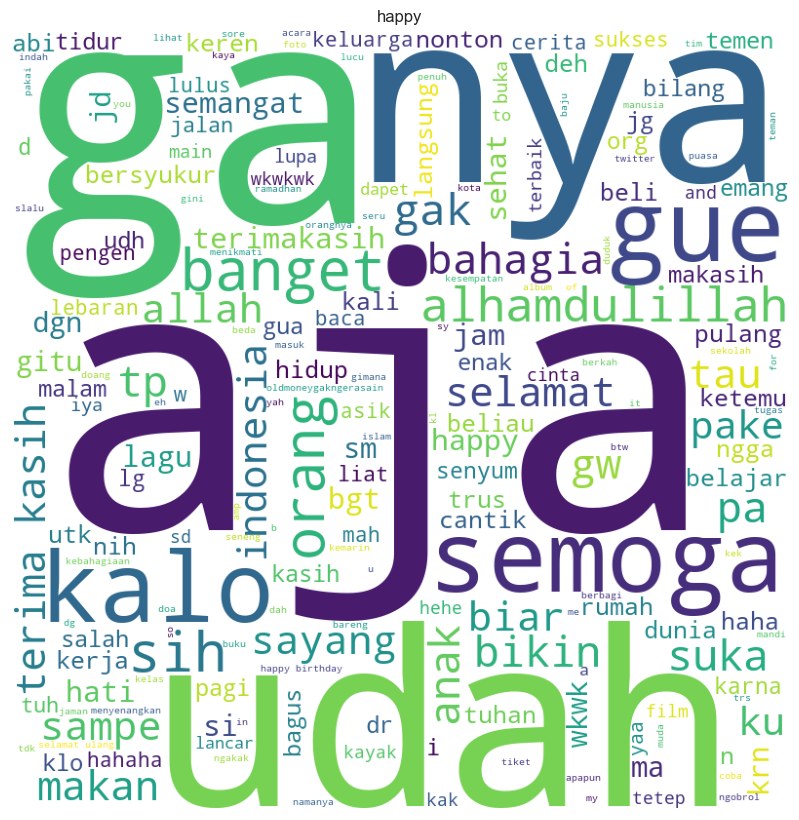

In [514]:
labels = set(data['label'])
for label in labels:
    plot_word_cloud(data[data['label'] == label], label)



In [515]:

for label in labels:
    print(label)
    data[data['label'] == label].describe()


love
anger
fear
sadness
happy


In [516]:
data

,label,tweet,Num_word_tweet,mentions,hashtags,punctuation_count,char_count,unique_word_count,url_count,stop_word_count
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",27,2,0,15,220,25,1,4
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",35,0,0,9,235,33,0,12
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,17,0,0,6,116,17,0,2
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",32,0,0,14,250,31,1,6
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...",30,1,0,10,203,29,0,7
...,...,...,...,...,...,...,...,...,...,...
4396,love,"Tahukah kamu, bahwa saat itu papa memejamkan m...",24,0,0,4,168,22,0,10
4397,fear,Sulitnya menetapkan Calon Wapresnya Jokowi di ...,35,0,4,6,268,33,0,10
4398,anger,"5. masa depannya nggak jelas. lha iya, gimana ...",30,0,1,13,200,28,0,7
4399,happy,[USERNAME] dulu beneran ada mahasiswa Teknik U...,35,1,0,9,246,33,0,9


In [519]:
metadata = data.drop(columns=['tweet'])
# Aggregate means by label
agg_df = metadata.groupby('label').mean().reset_index()

# Set the label as index
agg_df = pd.DataFrame(agg_df.set_index('label'))
agg_df

,Num_word_tweet,mentions,hashtags,punctuation_count,char_count,unique_word_count,url_count,stop_word_count
label,,,,,,,,
anger,29.676658,0.762035,0.089010,8.090827,187.948229,26.806540,0.157130,9.074478
fear,30.007704,0.275809,0.055470,6.201849,183.790447,27.391371,0.087827,9.334361
happy,27.388397,0.442478,0.376598,7.022616,178.261554,25.248771,0.218289,8.194690
love,28.500785,0.160126,0.122449,5.759812,180.249608,24.989011,0.114600,11.014129
sadness,28.604814,0.224674,0.136409,6.052156,180.752257,26.026078,0.104313,10.018054


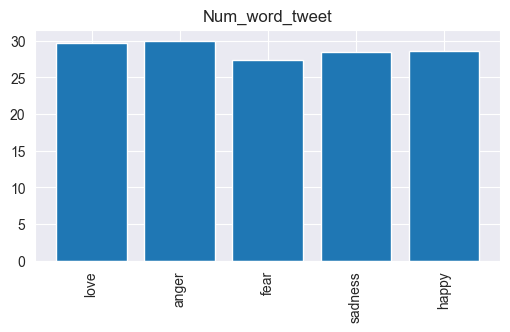

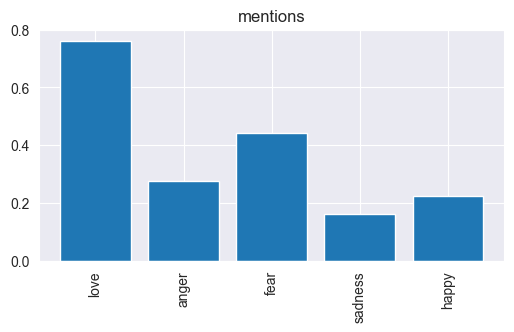

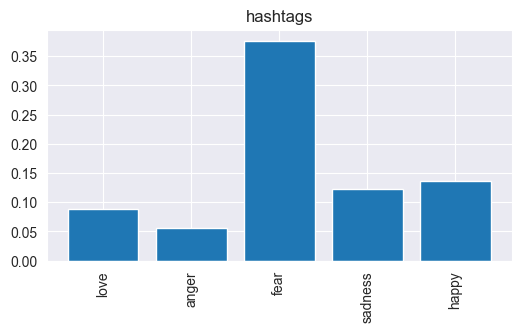

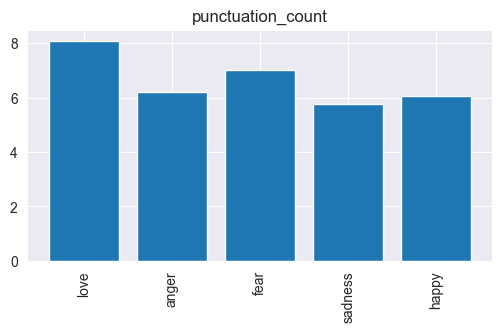

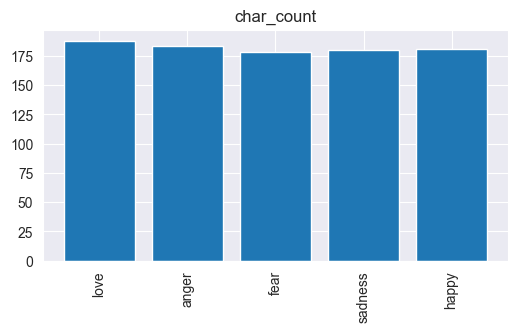

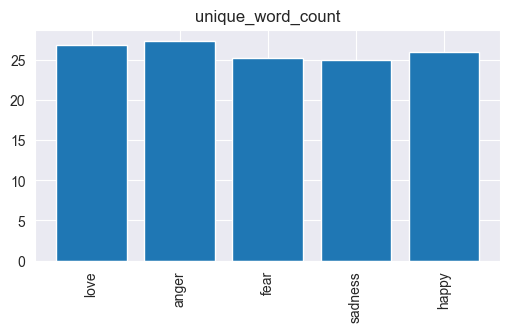

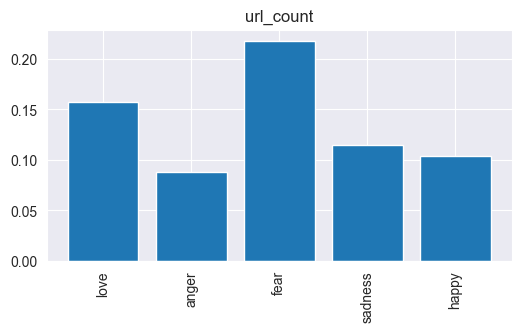

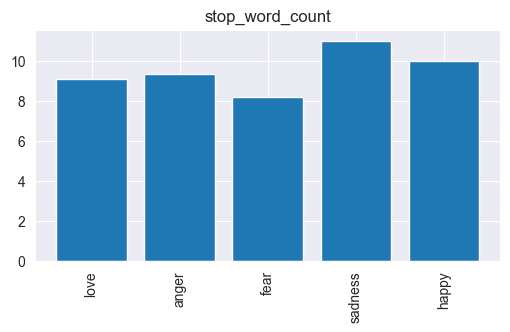

In [526]:

for column in agg_df.columns:
    plt.figure(figsize=(6, 3))
    plt.bar(height=agg_df[column],x=list(labels))
    plt.title(column)
    plt.xticks(rotation=90)


<Axes: >

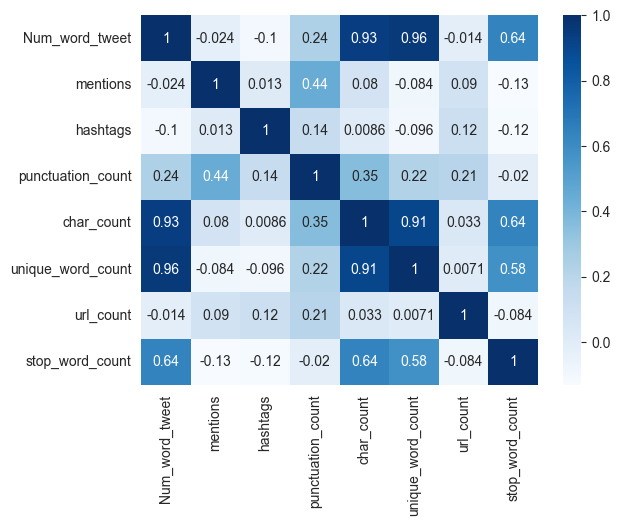

In [530]:
sns.heatmap(metadata.drop(columns=['label']).corr(), cmap="Blues", annot=True )